In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

C:\Users\mikol\anaconda3\envs\lectures\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"

df = pd.read_excel(url)
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

In [4]:
train_X, train_y = train_df.iloc[:, :-1], train_df.iloc[:, -1]

In [5]:
test_X, test_y = test_df.iloc[:, :-1], test_df.iloc[:, -1]

## Enhancements

### Dropout

![dropout](media\dropout.png)

### L1/L2 Weights Regularization

![regularization.png](media\regularization.png)

In [6]:
drop_rate = .1
lr = .001
hidden_size = 16
epochs = 250
val_frac = .25
metric = keras.losses.MeanSquaredError()
regularizer = 'l1_l2'
initializer = 'he_normal'

(array([266.  , 362.6 , 389.9 , 362.6 , 145.  , 276.4 , 149.  , 251.81,
        212.57, 393.  , 313.  , 170.3 , 469.  , 323.7 , 173.54, 228.  ,
        318.  , 250.2 , 273.  , 165.  ]),
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([295.55557, 402.88892, 433.22223, 402.88892, 161.11111, 307.1111 ,
        165.55556, 279.7889 , 236.1889 , 436.6667 , 347.7778 ,   0.     ,
        521.11115, 359.6667 , 192.82222, 253.33334, 353.33334, 278.     ,
          0.     ,   0.     ], dtype=float32)>)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 16)                144       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 178
Trainable params: 161
Non-trainable params: 17
_________________________________________________________________


<AxesSubplot:>

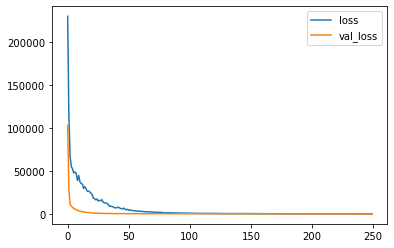

7/7 [==============================] - 0s 1ms/step - loss: 99.5318


99.53179168701172

## Multioutput

![multi](media\multi.svg)

In [15]:
base_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

red = pd.read_csv(f'{base_path}winequality-red.csv', sep=';')
white = pd.read_csv(f'{base_path}winequality-white.csv', sep=';')
red['color'] = 1
white['color'] = 0
df = pd.concat([red, white])
df['quality'] = df.quality.astype(np.float32)
df['color'] = df.color.astype(np.int64)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,1


In [16]:
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

In [17]:
train_X, train_y = train_df.iloc[:, :-2], train_df.iloc[:, -2:]

In [18]:
test_X, test_y = test_df.iloc[:, :-2], test_df.iloc[:, -2:]

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 normalization_1 (Normalization  (None, 11)          23          ['input_1[0][0]']                
 )                                                                                                
                                                                                                  
 dense_2 (Dense)                (None, 16)           192         ['normalization_1[0][0]']        
                                                                                                  
 quality (Dense)                (None, 1)            17          ['dense_2[0][0]']            

<AxesSubplot:>

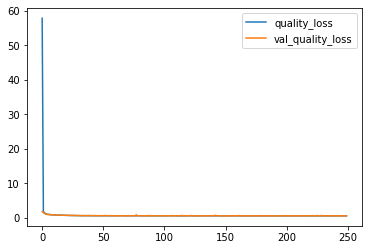

<AxesSubplot:>

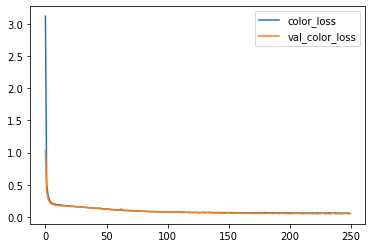

<AxesSubplot:>

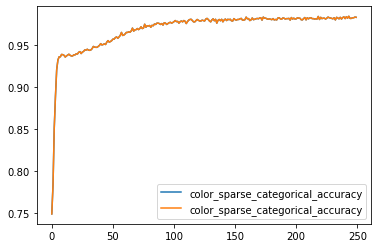

25/25 [==============================] - 0s 914us/step - loss: 0.5771 - quality_loss: 0.5513 - color_loss: 0.0258 - color_sparse_categorical_accuracy: 0.9912


[0.577056884765625,
 0.5512869954109192,
 0.025769904255867004,
 0.9911949634552002]

## NLP/RNN

In [30]:
(train_dataset, test_dataset), info = tfds.load('ag_news_subset', with_info=True,
                          as_supervised=True, split=['train[:50%]', 'test[:50%]'])

b'AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.'
3


array(['', '[UNK]', 'the', 'a', 'to', 'of', 'in', 'and', 'on', 'for',
       'that', '39s', 'with', 'as', 'its', 'at', 'is', 'said', 'by', 'it'],
      dtype='<U14')

![embedding](media\embedding.png)
![rnn](media\rnn.png)
![lstm](media\lstm.webp)

Epoch 1/5
938/938 [==============================] - 27s 26ms/step - loss: 1.1369 - accuracy: 0.4713 - val_loss: 0.9422 - val_accuracy: 0.5271
Epoch 2/5
938/938 [==============================] - 30s 32ms/step - loss: 0.8292 - accuracy: 0.6272 - val_loss: 0.6761 - val_accuracy: 0.7167
Epoch 3/5
938/938 [==============================] - 32s 34ms/step - loss: 0.6178 - accuracy: 0.7565 - val_loss: 0.5815 - val_accuracy: 0.7792
Epoch 4/5
938/938 [==============================] - 29s 31ms/step - loss: 0.5262 - accuracy: 0.8120 - val_loss: 0.5015 - val_accuracy: 0.8339
Epoch 5/5
938/938 [==============================] - 28s 30ms/step - loss: 0.4648 - accuracy: 0.8392 - val_loss: 0.4677 - val_accuracy: 0.8422


<AxesSubplot:>

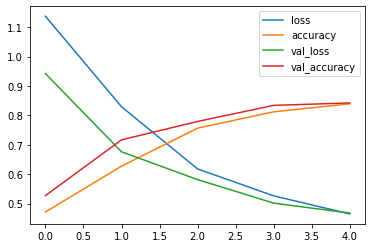

In [52]:
from nltk.corpus import stopwords

def custom_standarization(input_data):
    lowercase = tf.strings.lower(input_data)
    filtered = tf.strings.regex_replace(lowercase, r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*',"")
    return tf.strings.regex_replace(filtered, r'[\!\"\#\$\%\&\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\@\[\]\^\_\`\{\|\}\~]',"")




Epoch 1/5
938/938 [==============================] - 83s 83ms/step - loss: 0.7783 - accuracy: 0.7076 - val_loss: 0.3977 - val_accuracy: 0.8630
Epoch 2/5
938/938 [==============================] - 81s 87ms/step - loss: 0.3339 - accuracy: 0.8916 - val_loss: 0.3463 - val_accuracy: 0.8880
Epoch 3/5
938/938 [==============================] - 81s 86ms/step - loss: 0.2389 - accuracy: 0.9263 - val_loss: 0.3468 - val_accuracy: 0.8906
Epoch 4/5
938/938 [==============================] - 82s 87ms/step - loss: 0.1778 - accuracy: 0.9481 - val_loss: 0.3685 - val_accuracy: 0.8870
Epoch 5/5
938/938 [==============================] - 83s 89ms/step - loss: 0.1337 - accuracy: 0.9621 - val_loss: 0.3980 - val_accuracy: 0.8818


<AxesSubplot:>

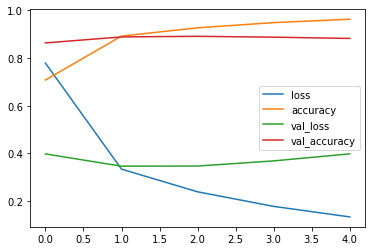

## TensorBoard

![tensorboard](media\tensorboard.png)

Reusing TensorBoard on port 6006 (pid 25060), started 3:43:57 ago. (Use '!kill 25060' to kill it.)